# tests
Word2vec & Gensim

In [1]:
import pandas as pd
import numpy as np


In [2]:
df_global = pd.read_csv("df_global.csv")
print(len(df_global['track_id'].unique()), "morceaux distincts")

161456 morceaux distincts


In [3]:
# creation d'un dataframe 1 morceau et tous les hashtags (suppression des doublons id - hashtag)
df_vector = df_global[['track_id','hashtag']].drop_duplicates().groupby(['track_id'], as_index = False).agg({'hashtag': ' '.join})

In [4]:
df_vector

,track_id,hashtag
0,00003213fb3d4959f42e9157b0eda0a5,newchristianmusic
1,0000e47c1207e2c637a44753a713456f,rock pops 70s music
2,0001dc79946a42fbc837c044be0bdbbc,apt
3,000248c97c5991b9900360aca97d9879,musicislife disturbed tbfmonline vkscrobbler
4,00027df4d0bd64108624757fe4cbfe76,radio rock music hardrock
...,...,...
161451,fffd293d9450783348d5f9d169ed8abe,hopes
161452,fffd8d636ba5082a01d9f4127ac17b89,listenlive
161453,fffd997ff184ba9929358a77644fff6c,musicislife
161454,fffdf00857154771de0d8479d8341e1e,stonerrock doommetal


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A454131\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

# ajouter stopwords
useless_words = ['listenlive','class95','kiss92','music','6music','234radio',
                 'jammin105','radio2','audio5cafe','radio','bbc6music','tweetlink',
                 'myplaylist','tbfmonline', 'vkscrobbler', 'wzbt', 'nowlistening',
                 'spotify', 'onlineradio', 'tunein', 
                 # ajout avril 2022
                 'hottraxxradio', 'radiokaras', 'itunes', 'nowonair', 'rcbs', 'musicbox', 'radio19', 'radiowivenhoe',
                 'listeningnow', 'musiquenonstop', 'anghami', 'tuneinradio', 'radio1', 'barbwiresradio', 'musicislife', 
                 'radiopowermix', 'yourmusic', 'freshradio'
                 'googleplay', 'songoftheday', 'nazaplaylist', 'repost', 'iphone', 'windowsphone', 'android', 'blackberry', 
                 'ontheair', 'onair', 'listeningto', 'like', 'radio98rock', 'lastfm', 'hgsradio', 'twittamp'
                ]
stop.extend(useless_words)

In [7]:
# hashtag sans les stopwords
# df_vector['hashtag_cleaned'] = df_vector['hashtag'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# hashtag sans les stopwords + nettoyage (suppression des mots caractères spéciaux)

import re
# re.sub(r"[^A-Za-z0-9]", " ", strng).strip().lower() 
df_vector['hashtag_cleaned'] = df_vector['hashtag'].apply(lambda x: ' '.join([re.sub(r"[^A-Za-z0-9]", " ", word).strip().lower() for word in x.split() if word not in (stop)]))

# remplacer mots vides (espaces) par NaN
df_vector['hashtag_cleaned'] = df_vector['hashtag_cleaned'].replace(r'^\s*$', np.NaN, regex=True)

# colonnes différentes
df_vector[df_vector['hashtag']!=df_vector['hashtag_cleaned']]


,track_id,hashtag,hashtag_cleaned
1,0000e47c1207e2c637a44753a713456f,rock pops 70s music,rock pops 70s
3,000248c97c5991b9900360aca97d9879,musicislife disturbed tbfmonline vkscrobbler,disturbed
4,00027df4d0bd64108624757fe4cbfe76,radio rock music hardrock,rock hardrock
5,000359abe73f500143335921d078a7b0,listenlive class95 kiss92 music 6music radiopo...,tsgonair planet90 niurock radiocidadeoficial t...
7,0003f7b02133154299b9c65215b3ac1e,wzbt,NaN
...,...,...,...
161449,fffd0d291f4addb6c4640a0f50d22f3f,hitmusic chicagomusic listenlive hitparty,hitmusic chicagomusic hitparty
161450,fffd0e6aa371d5d9f325092b4b176a5b,listenlive,NaN
161452,fffd8d636ba5082a01d9f4127ac17b89,listenlive,NaN
161453,fffd997ff184ba9929358a77644fff6c,musicislife,NaN


In [8]:
df_vector.dropna(subset=['hashtag_cleaned'], inplace=True)
# df_vector.drop(columns=['hashtag'], inplace=True)

df_vector.reset_index(drop=True, inplace=True)

In [9]:
df_vector

,track_id,hashtag,hashtag_cleaned
0,00003213fb3d4959f42e9157b0eda0a5,newchristianmusic,newchristianmusic
1,0000e47c1207e2c637a44753a713456f,rock pops 70s music,rock pops 70s
2,0001dc79946a42fbc837c044be0bdbbc,apt,apt
3,000248c97c5991b9900360aca97d9879,musicislife disturbed tbfmonline vkscrobbler,disturbed
4,00027df4d0bd64108624757fe4cbfe76,radio rock music hardrock,rock hardrock
...,...,...,...
98368,fffcb8cf9c5fc962a1d725ed7cc16414,morningplaylist,morningplaylist
98369,fffcbd587a4b3b465186825dcbe41f72,infidelsoftheworldunite,infidelsoftheworldunite
98370,fffd0d291f4addb6c4640a0f50d22f3f,hitmusic chicagomusic listenlive hitparty,hitmusic chicagomusic hitparty
98371,fffd293d9450783348d5f9d169ed8abe,hopes,hopes


## Word2vec

In [10]:
sent = [row.split(' ') for row in df_vector['hashtag_cleaned']]

In [11]:
sent[:2]

[['newchristianmusic'], ['rock', 'pops', '70s']]

In [12]:
from gensim.models import Word2Vec

model_wv = Word2Vec(sent, min_count=1, vector_size= 50, workers=3, window =3, sg = 1)

C:\confidentiel\app\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [13]:
model_wv.wv.most_similar('rock')[:5]

[('black', 0.8076562881469727),
 ('heavymetal', 0.807134747505188),
 ('guitar', 0.7974579930305481),
 ('heavennorhell', 0.7944267988204956),
 ('tsgonair', 0.7924015522003174)]

In [14]:
import random
rand_idx = random.randint(0, df_vector.shape[0])
print(df_vector.iloc[rand_idx]['track_id'])
print(df_vector.iloc[rand_idx]['hashtag_cleaned'])

print('\nsimilarities:')
model_wv.wv.most_similar(df_vector.iloc[rand_idx]['hashtag_cleaned'].split())[:5]

0954d0c4e0fca9d7f829b376044c5d90
hiltonhead savannah soundslikemusic kelowna chesapeake roanoke bangor sacramento winnipeg ottawa baltimore kamloops medicinehat palmsprings yonkers murcia fayetteville stpetersburg jackson progressiveradio youngstown sanjose sonoma yuma honolulu foggia paradise indyref hollywood sausalito tempe mesa

similarities:


[('metric', 0.9813657402992249),
 ('nantes', 0.9764925241470337),
 ('hogwarts', 0.974003255367279),
 ('stellar', 0.9739423394203186),
 ('himym', 0.9734715819358826)]

## Gensim

In [15]:
from gensim.corpora import Dictionary

dictionnary = Dictionary(sent)

In [17]:
# https://tedboy.github.io/nlps/generated/generated/gensim.corpora.Dictionary.doc2bow.html
corpus = [dictionnary.doc2bow(text) for text in sent]
# id mot, nb de fois que le mot est utilisé
# poids ? ordre par poids ?

In [18]:
corpus[10]

[(50, 1), (88, 1)]

### TF-IDF

In [19]:
from gensim.models import TfidfModel

model_gen = TfidfModel(corpus)

# https://www.youtube.com/watch?v=m20_dfn6tsU
# mots les + rares ont un poids plus élevé (car plus discriminant)
# mots les plus fréquents ont une note plus basse 

In [20]:
from gensim import similarities
index = similarities.SparseMatrixSimilarity(model_gen[corpus], num_features=len(dictionnary))

# index similarity

In [21]:
import random
rand_idx = random.randint(0, df_vector.shape[0])
rand_trackid = df_vector.iloc[rand_idx]['track_id']
rand_hashtag = df_vector.iloc[rand_idx]['hashtag_cleaned']

query = dictionnary.doc2bow(rand_hashtag.split())
sims = index[model_gen[query]]
docnumber = sorted(enumerate(sims), key=lambda x: x[1], reverse=True)[0][0]

print(rand_trackid)
print(rand_hashtag)
print('\nsimilarities:')
print(df_vector.iloc[docnumber]['track_id'])
print(df_vector.iloc[docnumber]['hashtag_cleaned'])

801f5c5ec00689390e456223257f5b19
pvstar  bbb 1111 baseballbear  13  baseballbear

similarities:
eeaef854a397ec51f6517da6b600a084
bbb 1111 baseballbear  13 baseballbear 


In [31]:
# multiple similarities 
rand_idx = random.randint(0, df_vector.shape[0])
rand_trackid = df_vector.iloc[rand_idx]['track_id']
rand_hashtag = df_vector.iloc[rand_idx]['hashtag_cleaned']

query = dictionnary.doc2bow(rand_hashtag.split())
sims = index[model_gen[query]]
    
# nb de morceaux similaires
nb_sim = 15
doc_sim = sorted(enumerate(sims), key=lambda x: x[1], reverse=True)[:nb_sim]
# print(doc_sim)
id_sim = [x[0] for x in doc_sim]
# print(id_sim)

print(rand_trackid)
print(rand_hashtag)
print('\nsimilarities:')
for i in id_sim:
    print(df_vector.iloc[i]['track_id'])
    print(df_vector.iloc[i]['hashtag_cleaned'])

bf4883f5c63ac3a3b240f7197c6bdcc6
country listen kbest957

similarities:
1b08d53836a26366c68d2247a6f9c193
country listen kbest957
330fccda327494618dfafd3741d8bfe7
country listen kbest957
8ba9ed78daafa2604a743bb5a9fac479
country listen kbest957
bf4883f5c63ac3a3b240f7197c6bdcc6
country listen kbest957
d4d81d2b7f7d5eb5299cfa40fd40c9d0
country listen kbest957
ea4a4d807e681d2f9b5ad4a83bce6189
country listen kbest957
f9eb71fa963417cca59c2490b47de892
country listen kbest957
0cac31312e8c513273940ba66017f2ab
baltimore country listen kbest957
0df0cef1dca516f15e03a945518b5c61
country listen kbest957 countrymusic
25ec4bdda68e2c2e5ef5bad1ee589ae7
country listen countrymusic kbest957
3deba3aa1851986cfca00929c73d3606
country listen countrymusic kbest957
44824addcbbd746090b68e90d8449809
country listen countrymusic kbest957
49c57b8842a0de17246fdb92798f2413
country listen countrymusic kbest957
80f96286872be03992ec46905c712e47
country listen countrymusic kbest957
95091358040f6c8885ff8cb74848d7f7
country l

In [32]:
print("mots cles :",rand_hashtag)
# 
print("query :",query)
# > (dictionnary[id], nb)
id_query_sim = [x[0] for x in query]
dict_sim = [dictionnary[i] for i in id_query_sim]
print("mots query :",dict_sim)

print("similarities: ", len(sims))
print(nb_sim, "doc similarities", doc_sim)

print("\n(id,vector) : track_id > hashtags")
for d in doc_sim:
    print('({0},{1:.2f}) : {2} \t> {3}'.format(d[0], d[1], df_vector.iloc[d[0]]['track_id'], df_vector.iloc[d[0]]['hashtag_cleaned']))


mots cles : country listen kbest957
query : [(148, 1), (701, 1), (719, 1)]
mots query : ['kbest957', 'country', 'listen']
similarities:  98373
15 doc similarities [(10471, 1.0), (19653, 1.0), (53739, 1.0), (73708, 1.0), (81918, 1.0), (90077, 1.0), (96071, 1.0), (4934, 0.92406404), (5449, 0.9050093), (14570, 0.9050093), (23803, 0.9050093), (26371, 0.9050093), (28391, 0.9050093), (49643, 0.9050093), (57288, 0.9050093)]

(id,vector) : track_id > hashtags
(10471,1.00) : 1b08d53836a26366c68d2247a6f9c193 	> country listen kbest957
(19653,1.00) : 330fccda327494618dfafd3741d8bfe7 	> country listen kbest957
(53739,1.00) : 8ba9ed78daafa2604a743bb5a9fac479 	> country listen kbest957
(73708,1.00) : bf4883f5c63ac3a3b240f7197c6bdcc6 	> country listen kbest957
(81918,1.00) : d4d81d2b7f7d5eb5299cfa40fd40c9d0 	> country listen kbest957
(90077,1.00) : ea4a4d807e681d2f9b5ad4a83bce6189 	> country listen kbest957
(96071,1.00) : f9eb71fa963417cca59c2490b47de892 	> country listen kbest957
(4934,0.92) : 0cac3

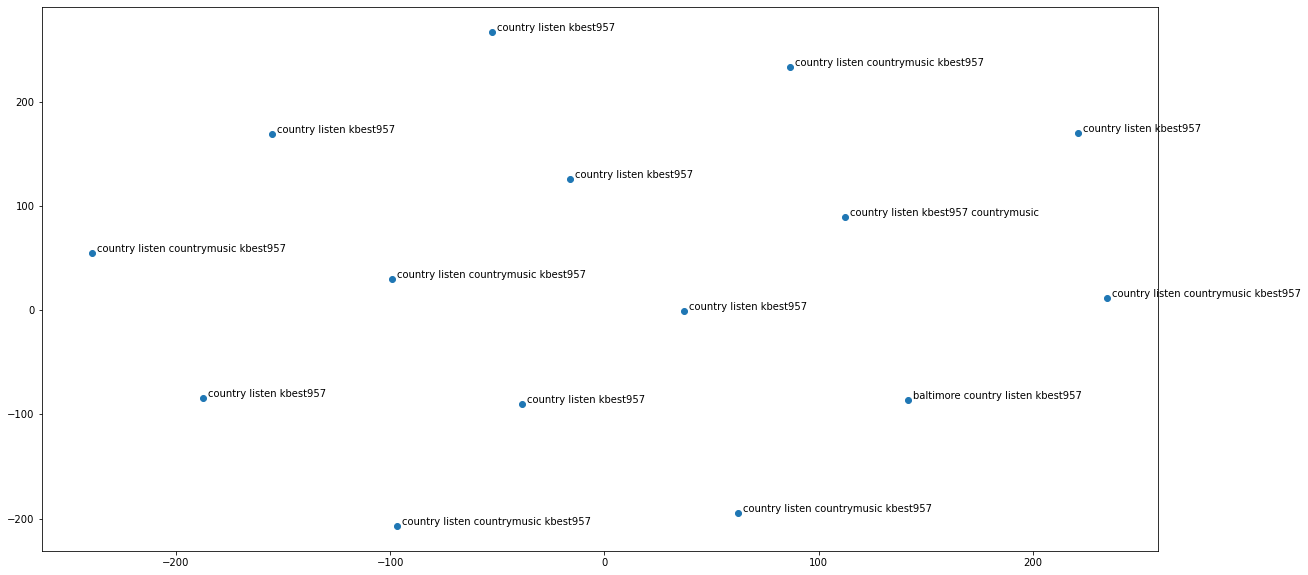

In [33]:
# représentation t-SNE
# https://datascientest.com/comprendre-lalgorithme-t-sne-en-3-etapes
# https://www.scikit-yb.org/en/latest/api/text/tsne.html

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

embeddings = TSNE(n_components=2)
Y = embeddings.fit_transform(doc_sim)
x_coords = Y[:, 0]
y_coords = Y[:, 1]

plt.figure(figsize=(20,10))
plt.scatter(x_coords, y_coords, cmap=plt.cm.Spectral)

for d, x, y in zip(doc_sim, x_coords, y_coords):
    label = df_vector.iloc[d[0]]['hashtag_cleaned']
    plt.annotate(label, xy=(x, y), xytext=(5, 1), textcoords='offset points')

plt.show()

### LSI

In [25]:
# https://radimrehurek.com/gensim/models/lsimodel.html
from gensim.models import LsiModel
model_lsi = LsiModel(corpus)

### LDA

In [26]:
from gensim.models import LdaModel

model_lda = LdaModel(corpus)